In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
pd.set_option('display.max_colwidth', None)

# Loading Time Series Tables: Employment per Neighborhood

In [4]:
emp = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\empregados.xls', None)

In [5]:
emp.keys()

dict_keys(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [7]:
keys = list(emp.keys())

# Cleaning

In [ ]:
2005: 0,1,3,5 / -10
...
2014: 0,1,3,5 / -8
...

In [137]:
emp_5to13 = [emp[keys[j]] for j in range(9)]

In [138]:
for i in range(9):
    
    df = emp_5to13[i].head(-10).tail(-2).dropna(how='any')
    df.columns = df.loc[2].values.tolist()
    df = df.tail(-1)
    
    emp_5to13[i] = df

In [139]:
[len(emp_5to13[i]) for i in range(9)]

[215, 215, 215, 215, 215, 215, 215, 215, 215]

In [90]:
emp_14on = [emp[keys[j]] for j in range(9,14)]

In [91]:
for i in range(5):
    
    df = emp_14on[i].head(-8).tail(-2).dropna(how='all')
    df.columns = df.loc[2].values.tolist()
    df = df.tail(-1)
    
    emp_14on[i] = df

In [93]:
[len(emp_14on[i]) for i in range(5)]

[219, 219, 219, 219, 219]

In [94]:
emps_list = emp_5to13 + emp_14on

In [95]:
for i in range(2005, 2019):
    
    df = emps_list[i-2005]
    
    df['Ano'] = [i for j in range(len(df))]
    df_cols = df.columns.values.tolist()
    df = df[[df_cols[-1]] + df_cols[:-1]]
    
    emps_list[i-2005] = df

In [96]:
emps = pd.concat(emps_list, axis=0)

In [97]:
emps.shape

(3066, 29)

# Testing

In [122]:
not_equal=[]
for i in range(len(emps_list)):
    for j in range(len(emps_list)):
        
        if i!=j:
            not_equal.append(emps_list[i]['Bairros'][emps_list[i]['Bairros']!=emps_list[j]['Bairros']])
            
            

In [144]:
not_equal[-4]

29     NaN
64     NaN
166    NaN
192    NaN
Name: Bairros, dtype: object

# Formatting and Type Conversion

In [151]:
emps.replace('-', np.nan, inplace=True)

In [153]:
emps.iloc[:, 2:] = emps.iloc[:, 2:].astype(float)

# Saving/Loading Complete Time Series of Neighborhood Employment:

In [154]:
#emps.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\emps_clean.csv', index=False)

In [155]:
emps = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\emps_clean.csv')

# Exploratory Analysis

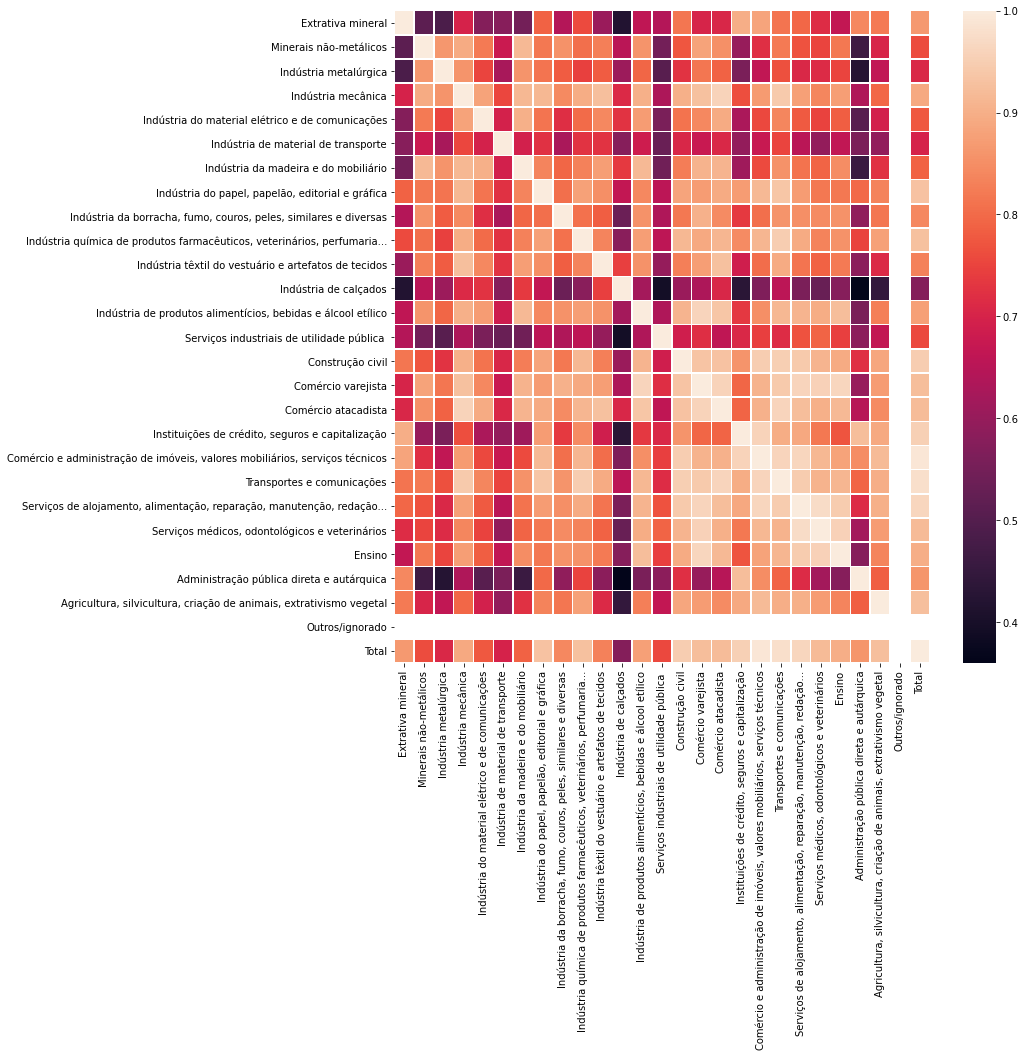

In [162]:
fig = plt.figure(figsize=(12,12))
ax0 = fig.add_subplot(111)

sns.heatmap(data=emps.iloc[:, 2:].astype(float).corr(), linewidths=0.5, ax=ax0)